# <font color='blue'>Business Analytics</font>

## <font >Análise de Indicadores de Performance em Redes de Varejo</font>

In [3]:
#Python Language Version 

from platform import python_version
print('Versão da Linguagem Python Usada neste projeto:', python_version())

Versão da Linguagem Python Usada neste projeto: 3.7.6


![title](imagem/KPIs.png)

## Marketing Analytics

Marketing Analytics compreende os processos e tecnologias que permitem aos profissionais de Marketing avaliar o sucesso de suas iniciativas. 

Isso é feito medindo o desempenho das campanhas de Marketing, coletando os dados e analisando os resultados. Marketing Analytics utiliza métricas importantes de negócios, como ROI (Retorno Sobre o Investimento), Atribuição de Marketing e Eficácia Geral do Marketing. Em outras palavras, o Marketing Analytics mostra se os programas de Marketing estão sendo efetivos ou não.

Marketing Analytics reúne dados de todos os canais de marketing e os consolida em uma visão de marketing comum. A partir dessa visão comum, você pode extrair resultados analíticos que podem fornecer assistência inestimável para impulsionar os esforços de marketing.

In [4]:
# To update a package, run the command below at the terminal or command prompt:
# pip install -U package_name

# To install the exact version of a package, run the command below at the terminal or command prompt:
#! pip install package_name == desired_version

# After installing or updating the package, restart the jupyter notebook.

# Install the watermark package.
# This package is used to record as versions of other packages used in this jupyter notebook.

!pip install -q -U watermark

You should consider upgrading via the 'c:\users\rodolfo\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [5]:
# Imports Packages 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import plotly
import matplotlib.pyplot as plt
import matplotlib as m
import plotly.offline as pyoff
import plotly.graph_objs as go
from datetime import datetime, timedelta
%matplotlib inline

In [6]:
# Imports for fromatting graphics

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

In [7]:
# Package versions used in this jupyter notebook

%reload_ext watermark
%watermark -a "Data Scientist: Rodolfo Terra" --iversions

Author: Data Scientist: Rodolfo Terra

numpy     : 1.18.2
matplotlib: 3.3.1
plotly    : 4.13.0
pandas    : 1.1.1
seaborn   : 0.12.0.dev0



## Carregando os Dados

In [8]:
# Load the data

dados = pd.read_csv('dados/dataset.csv', header = 0, encoding = 'unicode_escape')

In [9]:
# View tha data

dados.head()

,NumeroFatura,CodigoProduto,NomeProduto,Quantidade,DataVenda,ValorUnitario,IdCliente,Pais
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,Brasil
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Brasil
2,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Brasil
3,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Brasil
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Brasil


Nota: Cada linha (registro) representa um item de um pedido. Observe que a coluna NumeroFatura se repete indicando que é um mesmo pedido com itens diferentes. Para cada item temos o produto, a quantidade, o valor unitário, o cliente e o país.

In [10]:
# Number of rows and Columns

dados.shape

(541800, 8)

In [11]:
# Data Type

dados.dtypes

NumeroFatura      object
CodigoProduto     object
NomeProduto       object
Quantidade         int64
DataVenda         object
ValorUnitario    float64
IdCliente        float64
Pais              object
dtype: object

In [12]:
# Describer number columns

dados.describe()

,Quantidade,ValorUnitario,IdCliente
count,541800.000000,541800.000000,406725.000000
mean,9.551739,4.611581,15287.754038
std,218.103033,96.769576,1713.475925
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13954.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
# Checking for null values

dados.isna().sum()

NumeroFatura          0
CodigoProduto         0
NomeProduto        1454
Quantidade            0
DataVenda             0
ValorUnitario         0
IdCliente        135075
Pais                  0
dtype: int64

In [14]:
# removing the missing values

dados = dados.dropna()

In [15]:
# Checking for null values

dados.isna().sum()

NumeroFatura     0
CodigoProduto    0
NomeProduto      0
Quantidade       0
DataVenda        0
ValorUnitario    0
IdCliente        0
Pais             0
dtype: int64

In [16]:
# Convert the date column to the date type

dados.DataVenda = pd.to_datetime(dados.DataVenda)

In [17]:
# Range of dates the period that occurred the sales, now with correct data data type

print('Data mínima:', dados['DataVenda'].min())
print('Data máxima:', dados['DataVenda'].max())

Data mínima: 2010-12-01 08:26:00
Data máxima: 2011-12-09 12:50:00


In [18]:
# Countries for which sales occurred

dados['Pais'].unique()

array(['Brasil', 'Uruguai', 'Australia', 'Holanda', 'Alemanha', 'Noruega',
       'Irlanda', 'Espanha', 'Poland', 'Portugal', 'Italy', 'Belgium',
       'Lithuania', 'Japan', 'Iceland', 'Channel Islands', 'Dinamarca',
       'Cyprus', 'Sweden', 'Austria', 'Israel', 'Finland', 'Greece',
       'Cingapura', 'Iraque', 'Equador', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'China', 'Inglaterra', 'USA', 'Chile', 'Bahrain',
       'Malta', 'Paraguai'], dtype=object)

### Indicador 1 - Quantidade de Produtos Vendido

Irremos comparar a quantidade de produtos vendidos durante: os meses, dias, dias úteis para finais de semanal.

In [19]:
# Let's extract the details from the Datetime column: year, month, day and time

dados['ano'] = dados.DataVenda.dt.year
dados['mes'] = dados.DataVenda.dt.month
dados['dia'] = dados.DataVenda.dt.day
dados['hora'] = dados.DataVenda.dt.hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Janeiro'),
  Text(1, 0, 'Fevereiro'),
  Text(2, 0, 'Março'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Maio'),
  Text(5, 0, 'Junho'),
  Text(6, 0, 'Julho'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Setembro'),
  Text(9, 0, 'Outubro'),
  Text(10, 0, 'Novembro'),
  Text(11, 0, 'Dezembro')])

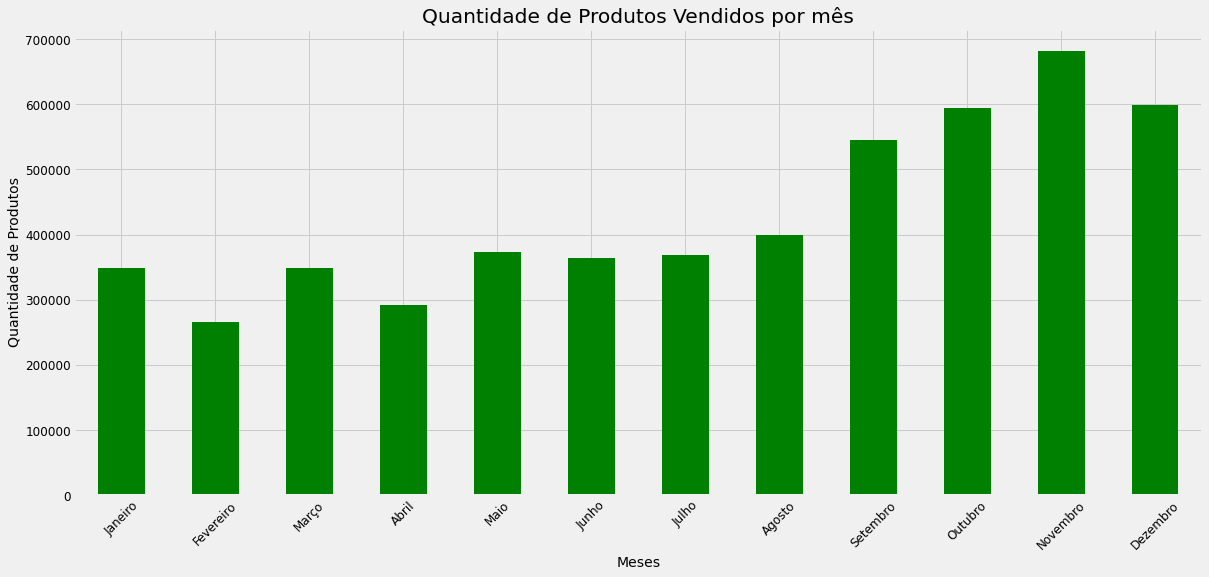

In [20]:
dados_quantidade = dados.query("Quantidade > 0"). reset_index(drop= True)

# Let's create a bar chart with the quantity of products sold per month.
# Demand peaks in August and falls in the following months.

dados_quantidade.groupby('mes')['Quantidade'].sum().plot.bar(color = 'green')
plt.title("Quantidade de Produtos Vendidos por mês")
plt.xlabel("Meses")
plt.ylabel("Quantidade de Produtos")
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
plt.xticks([x for x in range(12)], meses)
plt.xticks(rotation=45)


c:\users\rodolfo\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:title={'center':'Média de Quantidade de Produtos Vendidos por mês'}, xlabel='ano,mes'>

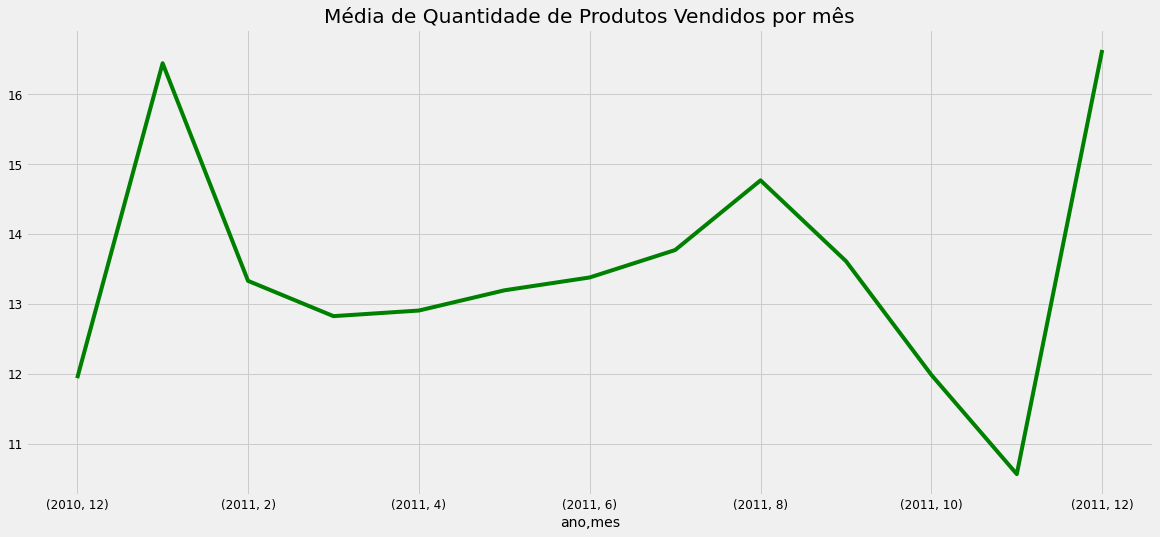

In [21]:
# Let's calculate the monthly average por year
# On average, there is a monthly growth in demand each year

media_mensal = dados_quantidade.groupby(['ano','mes'])['Quantidade'].mean()
media_mensal.plot(title = 'Média de Quantidade de Produtos Vendidos por mês', fontsize = 12, color = 'green')


Text(0, 0.5, 'Quantidade de Produtos')

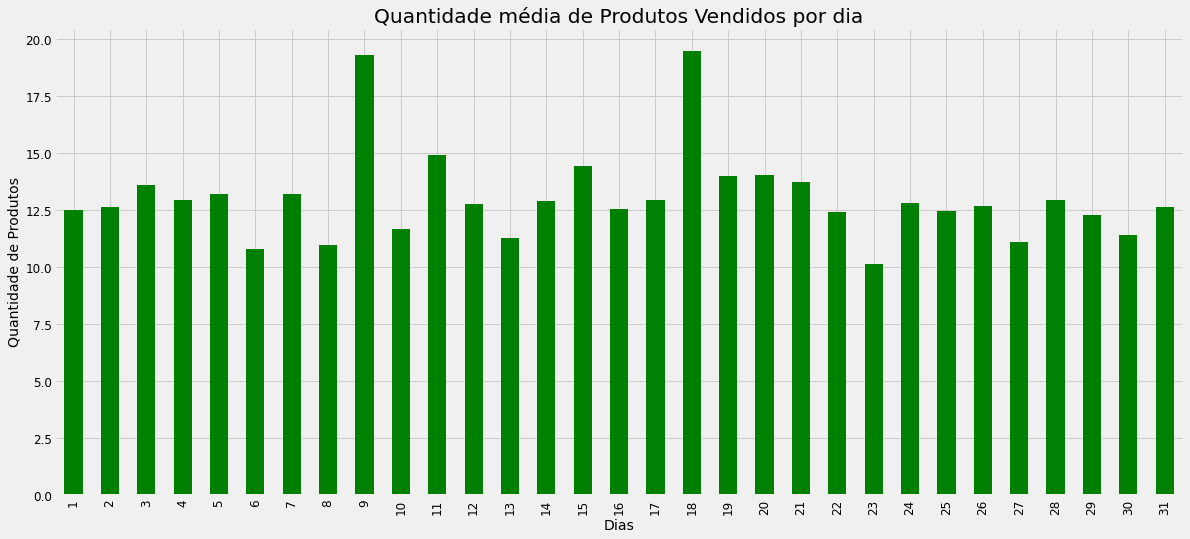

In [22]:
# And what will be the daily average per day of the month? Let's check.
# The day of the month does not appear to be relevant to demand.

dados_quantidade.groupby('dia')["Quantidade"].mean().plot.bar(color = 'green')
plt.title("Quantidade média de Produtos Vendidos por dia")
plt.xlabel("Dias")
plt.ylabel("Quantidade de Produtos")

Text(0, 0.5, 'Quantidade de Produtos')

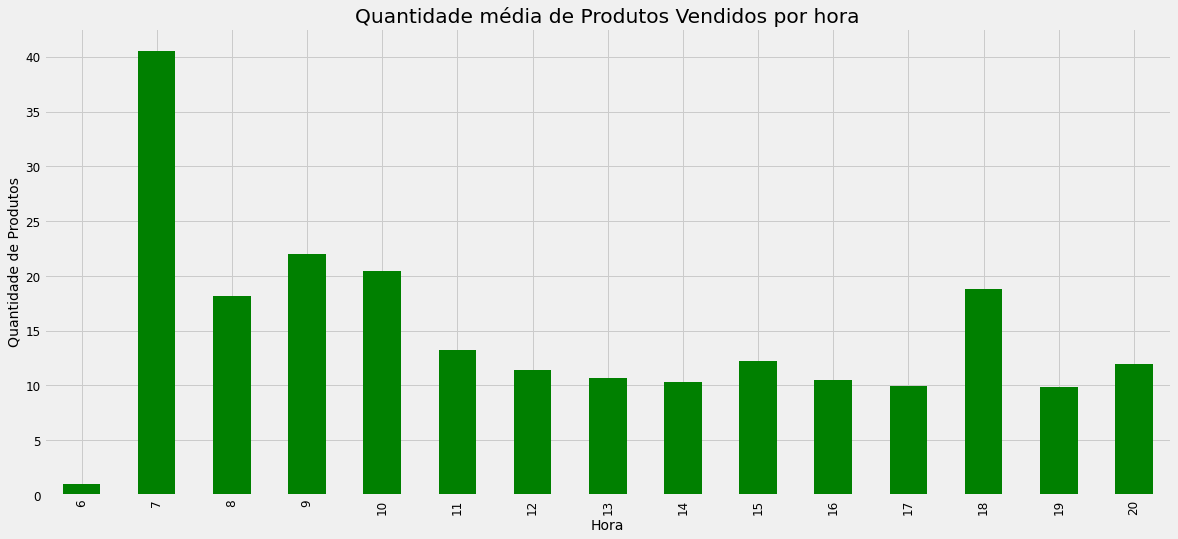

In [23]:
# Let's go down another level and analyze the average hourly demand.
# As expected, at dawn the average is lower than at other times of the day


dados_quantidade.groupby('hora')["Quantidade"].mean().plot.bar(color = 'green')
plt.title("Quantidade média de Produtos Vendidos por hora")
plt.xlabel("Hora")
plt.ylabel("Quantidade de Produtos")

In [24]:
# We need the day of the week too

# dados_quantidade['dias_semana'] = 

dados_quantidade['dias_semana'] = dados_quantidade['DataVenda'].dt.dayofweek


In [25]:
# It would to good to check if the fact that is a weekend or not impacts the uise of transportation.
#Let's extract this information. Days of the week equal to 05 or 6 are Saturday and Sunday.

# We created a function, where we mark weekends as 1 and working days as 0

def converteFimSemana(registro):
    if registro.dayofweek ==5 or registro.dayofweek == 6:
        return 'Final \nde Semana'
    else:
        return 'Segunda \na Sexta'

In [26]:
# Now we apply the function

dados_quantidade['final_semana'] = dados_quantidade['DataVenda'].apply(converteFimSemana)

(array([0, 1]),
 [Text(0, 0, 'Final \nde Semana'), Text(1, 0, 'Segunda \na Sexta')])

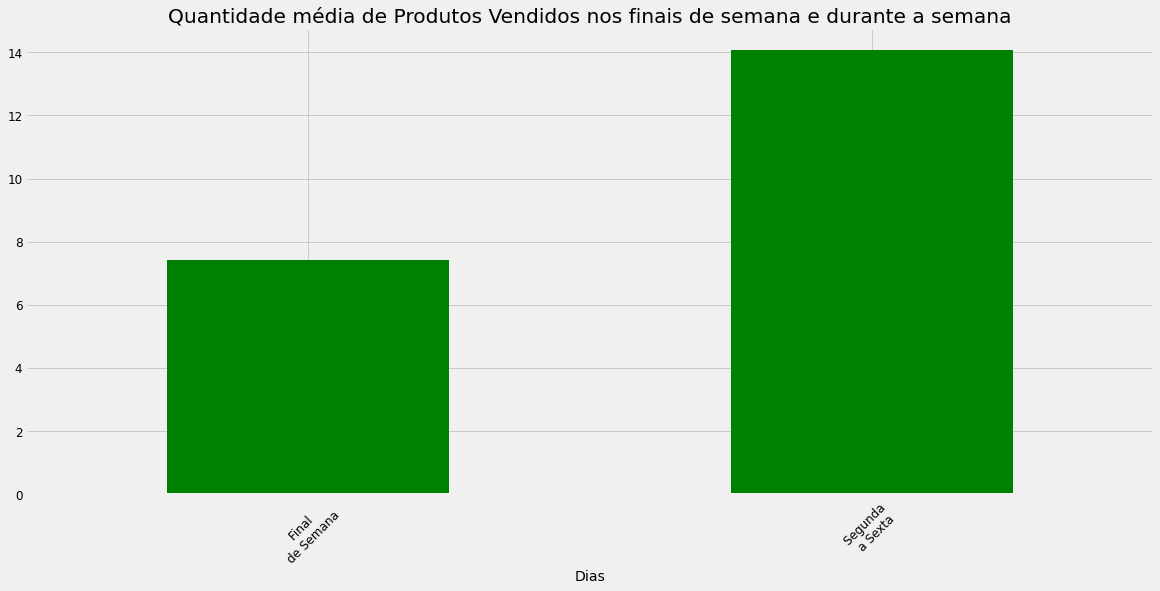

In [27]:
# Finally, let's look the average per weekend or business day. 
# As expected, demand is lower on the weekend, but not unlike business days.

dados_quantidade.groupby('final_semana')['Quantidade'].mean().plot.bar(color = 'green')
plt.title("Quantidade média de Produtos Vendidos nos finais de semana e durante a semana")
plt.xlabel('Dias')
plt.xticks(rotation=45)

### Indicador 2 - Faturamento Mensal


In [28]:
# Creating column

dados['Faturamento'] = dados['Quantidade'] * dados['ValorUnitario']

In [29]:
# Groupby

df_faturamento = dados.groupby(['ano','mes']).agg({'Faturamento': sum}).reset_index()

In [30]:
# Changing variables from integer to str

df_faturamento['ano'] = df_faturamento['ano'].astype(str)
df_faturamento['mes'] = df_faturamento['mes'].astype(str)

In [31]:
# Concatenating string

df_faturamento['id'] = df_faturamento['mes'] + '-'+df_faturamento['ano']

In [32]:
# Changing tyhe index

df_faturamento.index = df_faturamento['id']

In [33]:
# delete the columns

df_faturamento = df_faturamento.drop(columns=['ano'])
df_faturamento = df_faturamento.drop(columns=['mes'])
df_faturamento = df_faturamento.drop(columns=['id'])

In [34]:
df_faturamento = df_faturamento.query('Faturamento > 350000')

In [35]:
df_faturamento

,Faturamento
id,
12-2010,554604.020
1-2011,475074.380
2-2011,436546.150
3-2011,579964.610
4-2011,426047.851
5-2011,648251.080
6-2011,608013.160
7-2011,574238.481
8-2011,616368.000


**Visualização do Faturamento Mensal da Rede**

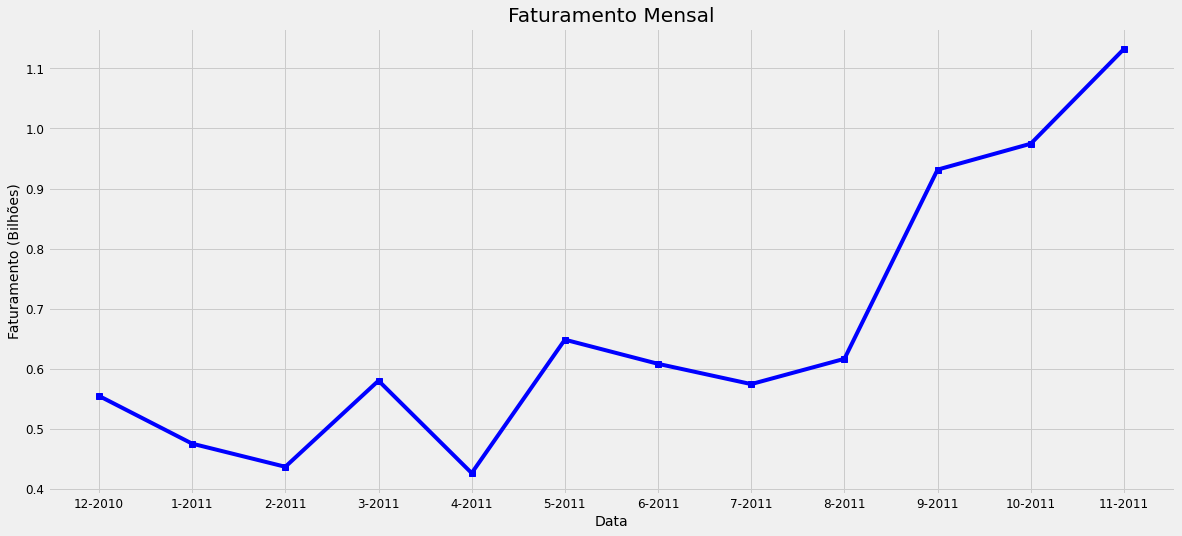

In [50]:
#plot
plt.title('Faturamento Mensal')
plt.plot(df_faturamento['Faturamento']/1000000, 'bs-')
plt.xlabel('Data')
plt.ylabel('Faturamento (Bilhões)')
plt.show()

### Indicador 2 - Faturamento Médio Mensal (Brasil)

In [36]:
# Copy ofData

faturamento_brasil = dados.copy()

faturamento_brasil = faturamento_brasil.query("Pais=='Brasil'").reset_index(drop = True)

In [37]:
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Janeiro'),
  Text(1, 0, 'Fevereiro'),
  Text(2, 0, 'Março'),
  Text(3, 0, 'Abril'),
  Text(4, 0, 'Maio'),
  Text(5, 0, 'Junho'),
  Text(6, 0, 'Julho'),
  Text(7, 0, 'Agosto'),
  Text(8, 0, 'Setembro'),
  Text(9, 0, 'Outubro'),
  Text(10, 0, 'Novembro'),
  Text(11, 0, 'Dezembro')])

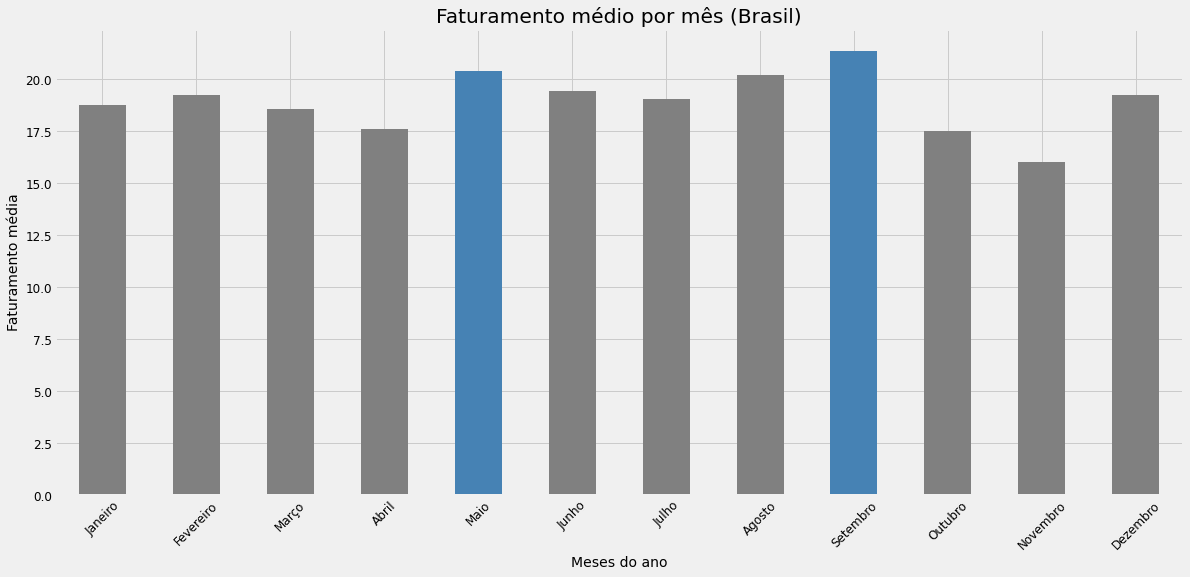

In [40]:
faturamento_brasil.groupby('mes')['Faturamento'].mean().plot(kind="bar", 
                                                 title="test", color = ('gray','gray','gray','gray','steelblue',
                                                              "grey",'gray','gray','steelblue','gray',
                                                              'gray','gray'))

meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
plt.xticks([x for x in range(12)], meses)
plt.title("Faturamento médio por mês (Brasil)")
plt.xlabel("Meses do ano")
plt.ylabel("Faturamento média")
plt.xticks(rotation=45)


**Faturamento médio de todos os países**

Text(0, 0.5, 'Faturamento (Bilhões)')

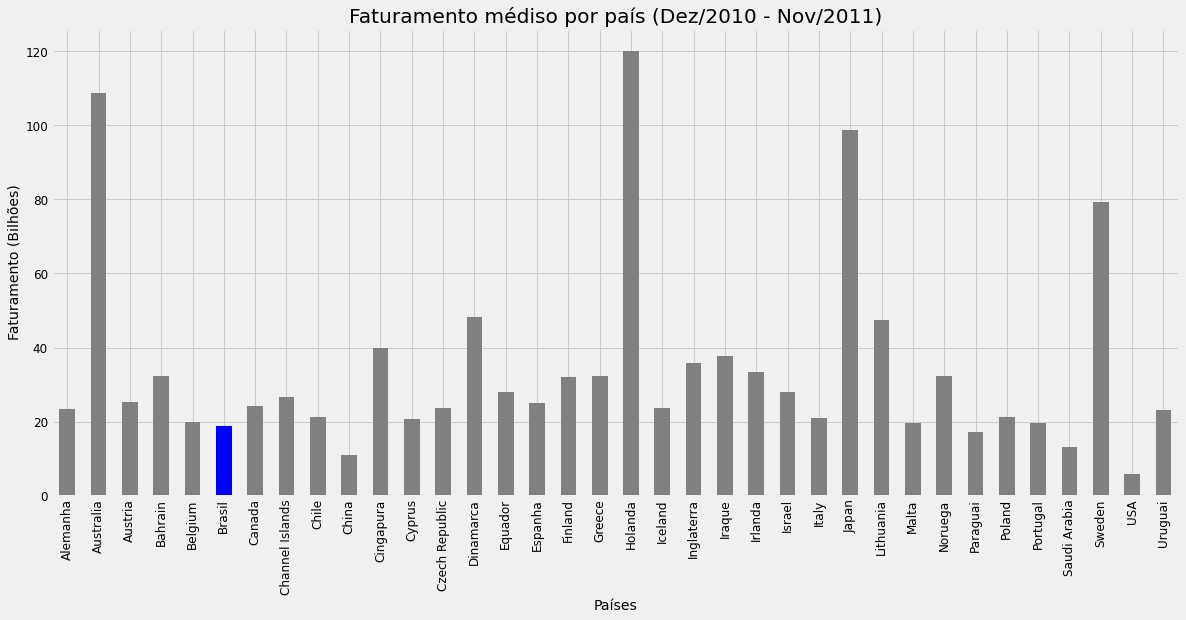

In [41]:
dados.groupby('Pais')['Faturamento'].mean().plot(kind="bar", 
                                                 title="test", color = ('gray','gray','gray','gray','gray',
                                                              "blue",'gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray',
                                                              'gray','gray','gray','gray','gray','gray','gray'))
plt.title("Faturamento médiso por país (Dez/2010 - Nov/2011)")
plt.xlabel("Países")
plt.ylabel("Faturamento (Bilhões)")

### Indicador 3 - Taxa Percentual de Crescimento Mensal


In [42]:
# Calculate the monthly percentage change

df_faturamento['CrescimentoMensal'] = df_faturamento['Faturamento'].pct_change()

In [43]:
# table data

df_faturamento

,Faturamento,CrescimentoMensal
id,,
12-2010,554604.020,NaN
1-2011,475074.380,-0.143399
2-2011,436546.150,-0.081099
3-2011,579964.610,0.328530
4-2011,426047.851,-0.265390
5-2011,648251.080,0.521545
6-2011,608013.160,-0.062072
7-2011,574238.481,-0.055549
8-2011,616368.000,0.073366


**Visualização do Crescimento Mensal da Rede**

O gráfico abaixo irá demonstrar o percentual mensal de todoa a rede de varejo. 

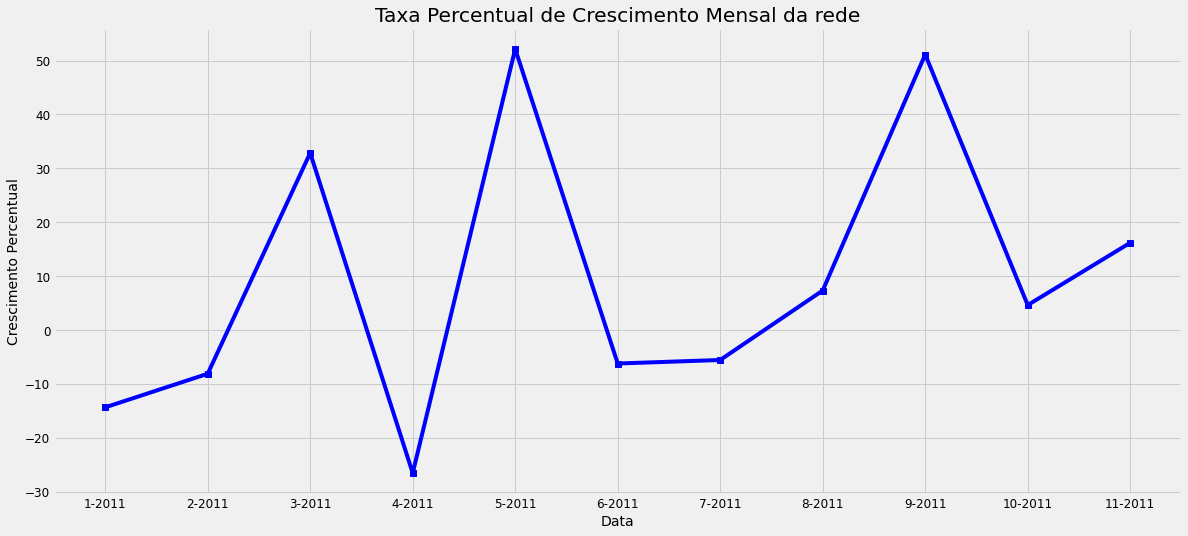

In [44]:
# Plot
plt.title('Taxa Percentual de Crescimento Mensal da rede')
plt.plot(df_faturamento['CrescimentoMensal']*100, 'bs-')
plt.xlabel('Data')
plt.ylabel('Crescimento Percentual')
plt.show()

**Visualização do Crescimento Mensal do Brasil**

O gráfico abaixo mostraremos a crescimento percentual do Brasil, em relação aos outros países

In [45]:
# Copy ofData

crecimento_brasil = dados.copy()

crecimento_brasil = crecimento_brasil.query("Pais=='Brasil'").reset_index(drop = True)


crecimento_brasil = crecimento_brasil.groupby(['ano','mes']).agg({'Faturamento': sum}).reset_index()

# Changing variables from integer to str

crecimento_brasil['ano'] = crecimento_brasil['ano'].astype(str)
crecimento_brasil['mes'] = crecimento_brasil['mes'].astype(str)

# Concatenating string

crecimento_brasil['id'] = crecimento_brasil['mes'] + '-'+crecimento_brasil['ano']

# Changing tyhe index

crecimento_brasil.index = crecimento_brasil['id']

# delete the columns

crecimento_brasil = crecimento_brasil.drop(columns=['ano'])
crecimento_brasil = crecimento_brasil.drop(columns=['mes'])
crecimento_brasil = crecimento_brasil.drop(columns=['id'])

# Calculate the monthly percentage change

crecimento_brasil['Cresimento_Brasil'] = crecimento_brasil['Faturamento'].pct_change()

crecimento_brasil = crecimento_brasil.query('Faturamento > 350000')


######################################


# Copy ofData

crescimento_outros_paises = dados.copy()

crescimento_outros_paises = crescimento_outros_paises.query("Pais!='Brasil'").reset_index(drop = True)


crescimento_outros_paises = crescimento_outros_paises.groupby(['ano','mes']).agg({'Faturamento': sum}).reset_index()

# Changing variables from integer to str

crescimento_outros_paises['ano'] = crescimento_outros_paises['ano'].astype(str)
crescimento_outros_paises['mes'] = crescimento_outros_paises['mes'].astype(str)

# # Concatenating string

crescimento_outros_paises['id'] = crescimento_outros_paises['mes'] + '-'+crescimento_outros_paises['ano']

# # Changing tyhe index

crescimento_outros_paises.index = crescimento_outros_paises['id']

# delete the columns

crescimento_outros_paises = crescimento_outros_paises.drop(columns=['ano'])
crescimento_outros_paises = crescimento_outros_paises.drop(columns=['mes'])
crescimento_outros_paises = crescimento_outros_paises.drop(columns=['id'])

# Calculate the monthly percentage change

crescimento_outros_paises['crescimento_outros_paises'] = crescimento_outros_paises['Faturamento'].pct_change()

crescimento_outros_paises = crescimento_outros_paises.query('Faturamento > 45000')

######################################

df_faturamento['Crescimento_Brasil'] = crecimento_brasil['Cresimento_Brasil']
df_faturamento['crescimento_outros_paises'] = crescimento_outros_paises['crescimento_outros_paises']
 


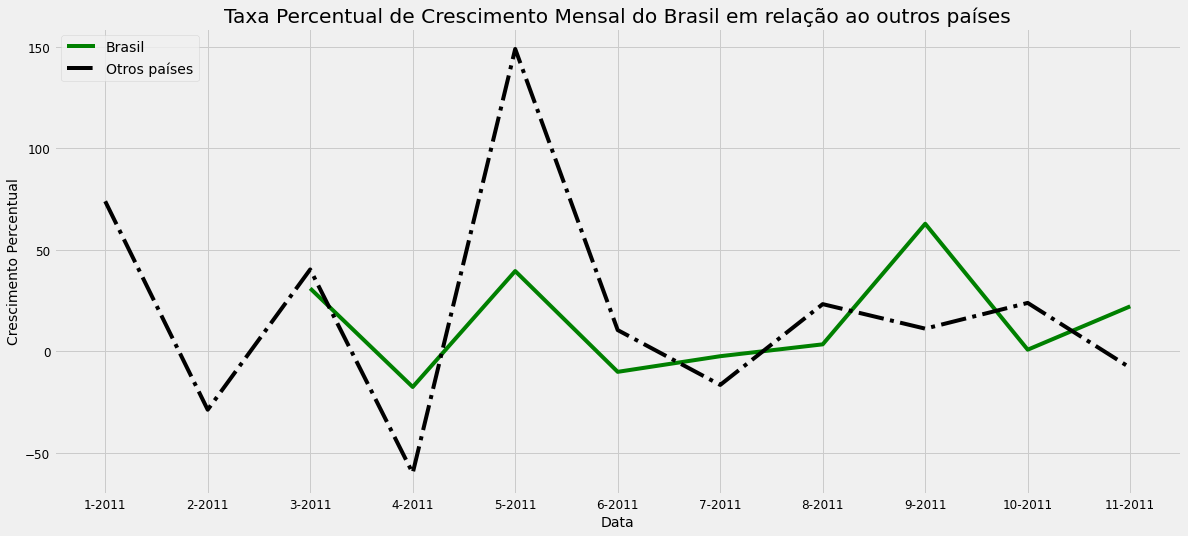

In [46]:
# Plot
plt.title('Taxa Percentual de Crescimento Mensal do Brasil em relação ao outros países')
plt.plot(df_faturamento['Crescimento_Brasil']*100,  color = "green")
plt.plot(df_faturamento['crescimento_outros_paises']*100, 'g-.', color = 'black')

plt.xlabel('Data')
plt.ylabel('Crescimento Percentual')
plt.legend(("Brasil",'Otros países'), loc='upper left')
plt.show()

### Indicador 4 - Clientes Ativos por mês no Brasil


Clientes ativos são aqueles que fizeram pelo menos uma compra em cada mês.

In [47]:
# Only with data from Brasil

dados_brasil = dados.query("Pais=='Brasil'").reset_index(drop = True)


In [48]:
# Changing variables from integer to str

dados_brasil['ano'] = dados_brasil['ano'].astype(str)
dados_brasil['mes'] = dados_brasil['mes'].astype(str)

In [49]:
# Conacting String

dados_brasil['id'] = dados_brasil['mes'] + '-'+dados_brasil['ano']

In [50]:
df_ativos_mes = dados_brasil.groupby('id')['IdCliente'].nunique().reset_index()


In [51]:
df_ativos_mes.index = df_ativos_mes['id']

# Drop
df_ativos_mes = df_ativos_mes.drop(columns=['id'])

In [52]:
df_ativos_mes

,IdCliente
id,
1-2011,684
10-2011,1285
11-2011,1548
12-2010,871
12-2011,614
2-2011,714
3-2011,923
4-2011,817
5-2011,985


In [53]:
df_ativos_mes.mean()

IdCliente    948.230769
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1-2011'),
  Text(1, 0, '10-2011'),
  Text(2, 0, '11-2011'),
  Text(3, 0, '12-2010'),
  Text(4, 0, '12-2011'),
  Text(5, 0, '2-2011'),
  Text(6, 0, '3-2011'),
  Text(7, 0, '4-2011'),
  Text(8, 0, '5-2011'),
  Text(9, 0, '6-2011'),
  Text(10, 0, '7-2011'),
  Text(11, 0, '8-2011'),
  Text(12, 0, '9-2011')])

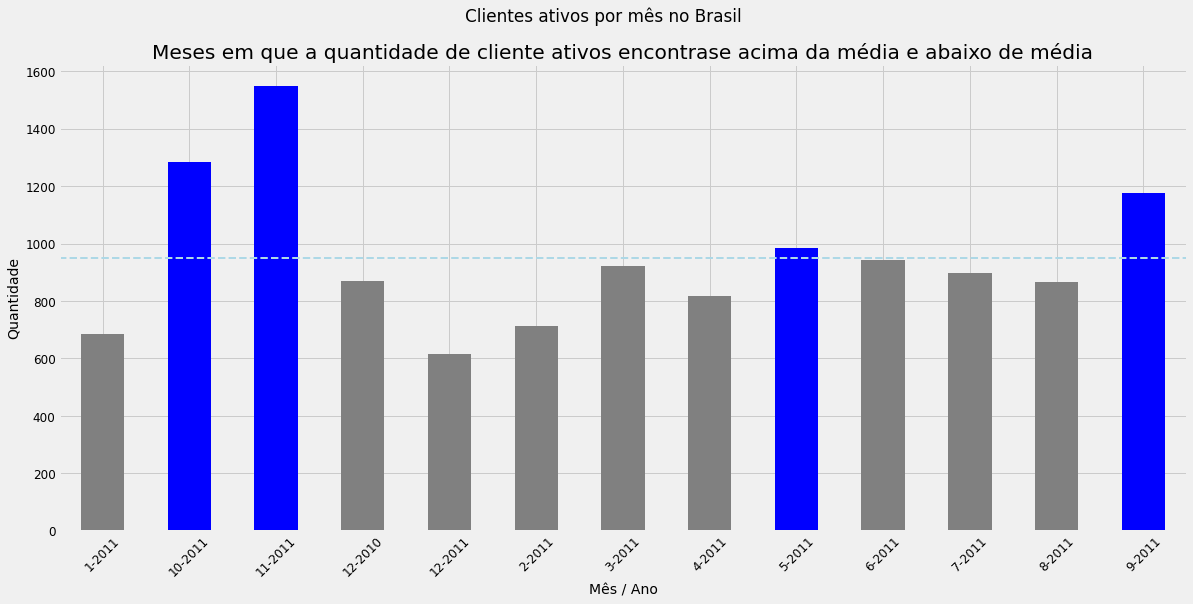

In [54]:
# Plot

df_ativos_mes['IdCliente'].plot(kind="bar", 
                                                 title="test", color = ('gray','blue','blue','gray','gray',
                                                              "gray",'gray','gray','blue','gray',
                                                              'gray','gray','blue'))
plt.title("Meses em que a quantidade de cliente ativos encontrase acima da média e abaixo de média")
plt.suptitle('Clientes ativos por mês no Brasil')
plt.axhline(y=948.23,  linewidth=2, linestyle = '--',color = 'lightblue')
plt.ylabel("Quantidade")
plt.xlabel("Mês / Ano")
plt.xticks(rotation=45)


### Indicador 5 - Diferença de Faturamento ao Longo do Tempo Entre Clienetse Novos e Antigos


Para este projeto iremos considerar cliente novo aquele com baixo volume de compras e cliente antigo aquele com alto volume de compras.

In [55]:
# Let's fgind the date of the lowest purchase volume for earch customer

df_compra_minima = dados.groupby('IdCliente')['DataVenda'].min().reset_index()

In [56]:
# Ajust the column names

df_compra_minima.columns = ['IdCliente','Data_Menor_Compra']

In [57]:
# Let's extract the month in which the lower purchase volume for each customer occurred

df_compra_minima['Mes_Menor_Compra_Mensal'] = df_compra_minima['Data_Menor_Compra'].map(lambda date: 100 * date.year + date.month)

In [58]:
# Data
df_compra_minima.head()

,IdCliente,Data_Menor_Compra,Mes_Menor_Compra_Mensal
0,12346.0,2011-01-18 10:01:00,201101
1,12347.0,2010-12-07 14:57:00,201012
2,12348.0,2010-12-16 19:09:00,201012
3,12349.0,2011-11-21 09:51:00,201111
4,12350.0,2011-02-02 16:01:00,201102


In [59]:
# Let's merge between the original dataset and the purchase volume dataset

dados_compras = pd.merge(dados, df_compra_minima, on = "IdCliente")

In [60]:
# Let's create a new user type columns and fill in as New

dados_compras['TipoUsuario'] = 'Novo'

In [61]:
dados_compras['AnoMes'] = dados_compras['DataVenda'].map(lambda date: 100 * date.year + date.month)


In [62]:
# An old customer is one whose purchase volume in the month is greater than the minimum volume
# If true, we change the UserType column to "Old" and if not, we keep it as "New"

dados_compras.loc[dados_compras['AnoMes'] > dados_compras['Mes_Menor_Compra_Mensal'], 'TipoUsuario'] = 'Antigo'

In [63]:
dados_compras['TipoUsuario'].value_counts()


Antigo    287549
Novo      119176
Name: TipoUsuario, dtype: int64

In [64]:
# Now we calculate billing by user type per month
df_faturamento_user_mes = dados_compras.groupby(['AnoMes', 'TipoUsuario'])['Faturamento'].sum().reset_index()

In [65]:
# We removed the month 12 of 2011 because we don't have enough data
df_faturamento_user_mes = df_faturamento_user_mes.query("AnoMes != 201012 and AnoMes != 201112")

In [66]:
# Data
df_faturamento_user_mes

,AnoMes,TipoUsuario,Faturamento
1,201101,Antigo,271616.520
2,201101,Novo,203457.860
3,201102,Antigo,287024.770
4,201102,Novo,149521.380
5,201103,Antigo,390034.530
6,201103,Novo,189930.080
7,201104,Antigo,306283.600
8,201104,Novo,119764.251
9,201105,Antigo,532392.340
10,201105,Novo,115858.740


In [67]:
cliente_novo = df_faturamento_user_mes.query("TipoUsuario == 'Novo' ").reset_index(drop = True)
cliente_antigo = df_faturamento_user_mes.query("TipoUsuario == 'Antigo' ").reset_index(drop = True)

**Visualização da Diferença de Faturamento ao Longo do Tempo entre Clientes Novos e Antigo**

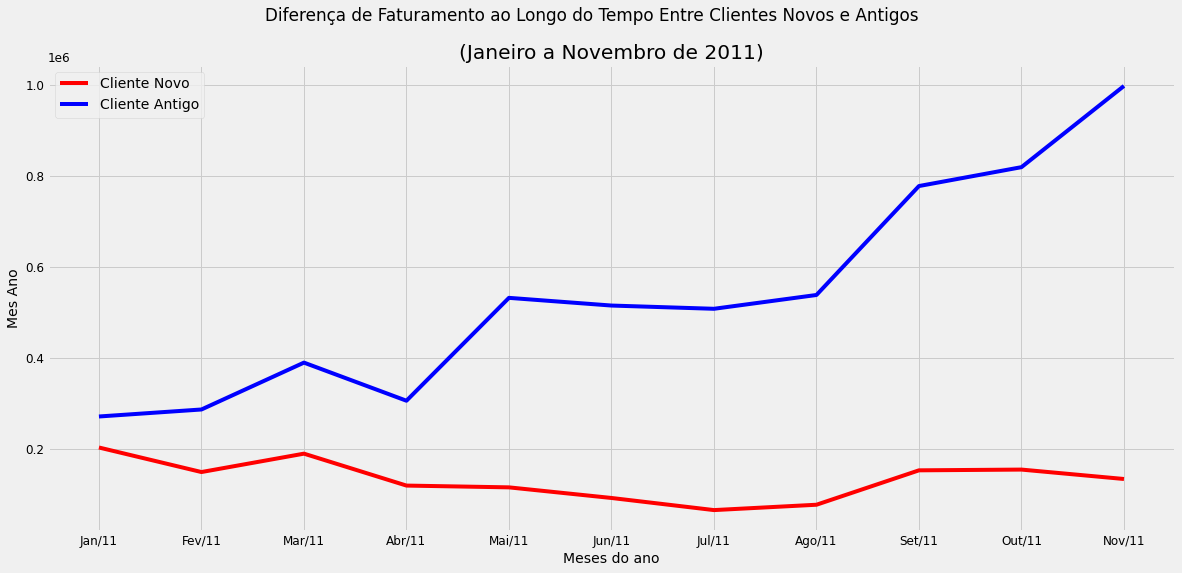

In [70]:
# Plot
plt.title('Diferença de Faturamento ao Longo do Tempo Entre Clientes Novos e Antigos')
plt.plot(cliente_novo['Faturamento'],  color = "red")
plt.plot(cliente_antigo['Faturamento'],  color = "blue")

plt.xlabel('Data')
plt.ylabel('')
plt.legend(("Cliente Novo",'Cliente Antigo'), loc='upper left')


meses = ['Jan/11','Fev/11','Mar/11','Abr/11','Mai/11','Jun/11','Jul/11','Ago/11','Set/11','Out/11','Nov/11']
plt.xticks([x for x in range(11)], meses)
plt.suptitle('Diferença de Faturamento ao Longo do Tempo Entre Clientes Novos e Antigos')
plt.title("(Janeiro a Novembro de 2011)")
plt.xlabel("Meses do ano")
plt.ylabel("Mes Ano")
plt.show()

### Indicador 6 - Taxa de Novos Clientes


In [75]:
# Calculates the rate of new customers

df_taxa_novos_clientes = dados_compras.query("TipoUsuario == 'Novo' ").groupby(['AnoMes'])['IdCliente'].nunique() / dados_compras.query("TipoUsuario == 'Antigo'").groupby(['AnoMes'])['IdCliente'].nunique() 


In [76]:
# Adjust index and remove missing values

df_taxa_novos_clientes = df_taxa_novos_clientes.reset_index()
df_taxa_novos_clientes = df_taxa_novos_clientes.dropna()

In [77]:
# Data

df_taxa_novos_clientes

,AnoMes,IdCliente
1,201101,1.162983
2,201102,0.909091
3,201103,0.758621
4,201104,0.498333
5,201105,0.348750
6,201106,0.287990
7,201107,0.238155
8,201108,0.205412
9,201109,0.296813
10,201110,0.328052


**Visualização da Taxa de Novos clientes**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan/11'),
  Text(1, 0, 'Fev/11'),
  Text(2, 0, 'Mar/11'),
  Text(3, 0, 'Abr/11'),
  Text(4, 0, 'Mai/11'),
  Text(5, 0, 'Jun/11'),
  Text(6, 0, 'Jul/11'),
  Text(7, 0, 'Ago/11'),
  Text(8, 0, 'Set/11'),
  Text(9, 0, 'Out/11'),
  Text(10, 0, 'Nov/11'),
  Text(11, 0, 'Dez/11')])

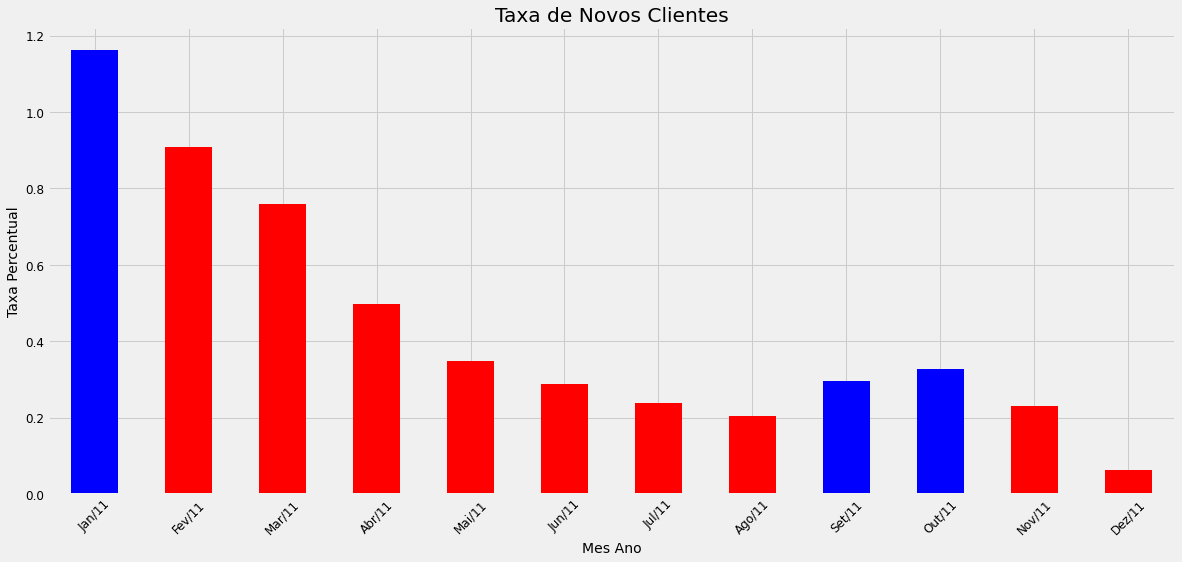

In [84]:
# Plot

df_taxa_novos_clientes['IdCliente'].plot(kind="bar", 
                                                 title="test", color = ('blue','red','red','red','red',
                                                              "red",'red','red','blue','blue',
                                                              'red','red'))
meses = ['Jan/11','Fev/11','Mar/11','Abr/11','Mai/11','Jun/11','Jul/11','Ago/11','Set/11','Out/11','Nov/11','Dez/11']
plt.xticks([x for x in range(12)], meses)
plt.title("Taxa de Novos Clientes")
plt.ylabel("Taxa Percentual")
plt.xlabel("Mes Ano")
plt.xticks(rotation=45)

### Indicador 7 - Taxa Mensal de Retenção de Clintes

Taxa Mensal de Retenção de Clientes = Clientes do Mês Anterior / Total de Clientes Ativos

In [85]:
# We group data by customer and month and add billing

dados_compras_clientes = dados_compras.groupby(['IdCliente','AnoMes'])['Faturamento'].sum().reset_index()

In [87]:
# Data
dados_compras_clientes.head()

,IdCliente,AnoMes,Faturamento
0,12346.0,201101,0.00
1,12347.0,201012,711.79
2,12347.0,201101,475.39
3,12347.0,201104,636.25
4,12347.0,201106,382.52


In [89]:
# Now we define retention with a crosstab

df_ret = pd.crosstab(dados_compras_clientes['IdCliente'], dados_compras_clientes['AnoMes']).reset_index()

In [90]:
# Data
df_ret.head()

AnoMes,IdCliente,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,1,0,0,1,0,1,0,1,0,1,0,1
2,12348.0,1,1,0,0,1,0,0,0,0,1,0,0,0
3,12349.0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12350.0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
# We extract the months
meses = df_ret.columns[2:]
meses

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='AnoMes')

In [93]:
# The loop below will calculate retention over months

# List to record the result

lista_ret = []

# Loop
for i in range(len(meses)-1):
    dados_retencao = {}
    mes_corrente = meses[i+1]
    mes_anterior = meses[i]
    dados_retencao['AnoMes'] = int(mes_corrente)
    dados_retencao['TotalUser'] = df_ret[mes_corrente].sum()
    dados_retencao['TotalRetido'] = df_ret[(df_ret[mes_corrente] > 0) & (df_ret[mes_anterior] > 0)][mes_corrente].sum()
    lista_ret.append(dados_retencao)
    
lista_ret

[{'AnoMes': 201102, 'TotalUser': 798, 'TotalRetido': 299},
 {'AnoMes': 201103, 'TotalUser': 1020, 'TotalRetido': 345},
 {'AnoMes': 201104, 'TotalUser': 899, 'TotalRetido': 346},
 {'AnoMes': 201105, 'TotalUser': 1079, 'TotalRetido': 399},
 {'AnoMes': 201106, 'TotalUser': 1051, 'TotalRetido': 464},
 {'AnoMes': 201107, 'TotalUser': 993, 'TotalRetido': 415},
 {'AnoMes': 201108, 'TotalUser': 980, 'TotalRetido': 433},
 {'AnoMes': 201109, 'TotalUser': 1302, 'TotalRetido': 465},
 {'AnoMes': 201110, 'TotalUser': 1425, 'TotalRetido': 552},
 {'AnoMes': 201111, 'TotalUser': 1711, 'TotalRetido': 690},
 {'AnoMes': 201112, 'TotalUser': 683, 'TotalRetido': 440}]

In [104]:
# Data
df_ret_final = pd.DataFrame(lista_ret)
df_ret_final.head()

,AnoMes,TotalUser,TotalRetido
0,201102,798,299
1,201103,1020,345
2,201104,899,346
3,201105,1079,399
4,201106,1051,464


In [105]:
# We calculate the indicador

df_ret_final['TaxaRetencao'] = df_ret_final['TotalRetido'] / df_ret_final['TotalUser']
df_ret_final

,AnoMes,TotalUser,TotalRetido,TaxaRetencao
0,201102,798,299,0.374687
1,201103,1020,345,0.338235
2,201104,899,346,0.384872
3,201105,1079,399,0.369787
4,201106,1051,464,0.441484
5,201107,993,415,0.417925
6,201108,980,433,0.441837
7,201109,1302,465,0.357143
8,201110,1425,552,0.387368
9,201111,1711,690,0.403273


**Visualização da Taxa de Retenção de clientes**

In [106]:
df_ret_final = df_ret_final.query("AnoMes != '201112' "). reset_index(drop= True)


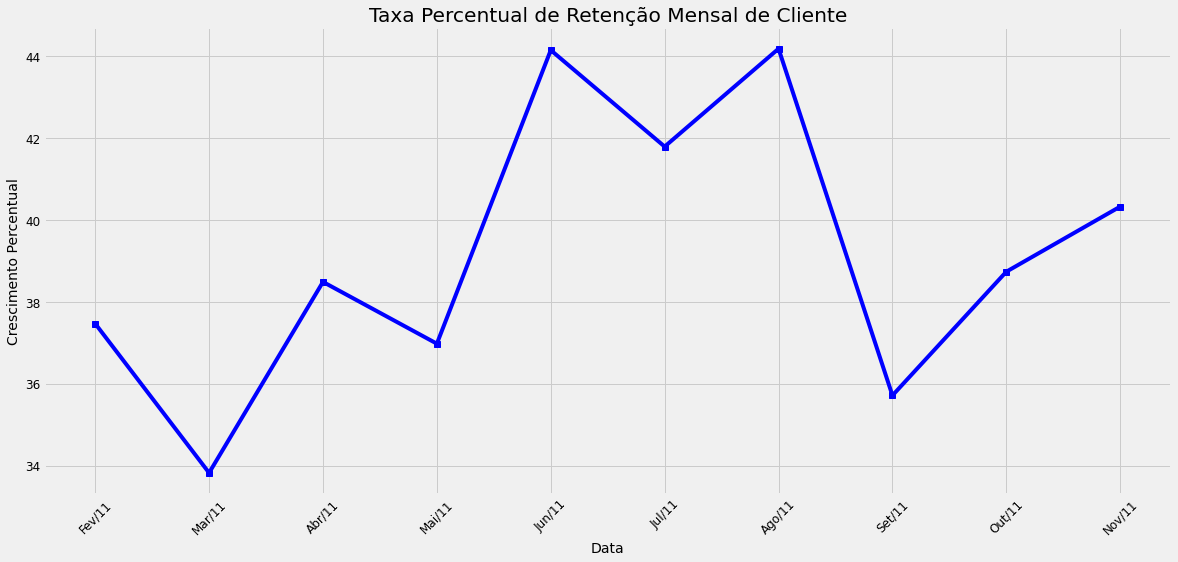

In [110]:
# Plot
plt.title('Taxa Percentual de Retenção Mensal de Cliente')
plt.plot(df_ret_final['TaxaRetencao']*100, 'bs-')
plt.xlabel('Data')
plt.ylabel('Crescimento Percentual')
meses = ['Fev/11','Mar/11','Abr/11','Mai/11','Jun/11','Jul/11','Ago/11','Set/11','Out/11','Nov/11']
plt.xticks([x for x in range(10)], meses)
plt.xticks(rotation=45)
plt.show()

![title](imagem/logo.png)